In [18]:
%matplotlib inline
#画像をくっつける
import pandas as pd#行列計算，データフレームの処理
import cv2#画像処理
import numpy as np#高速計算
import seaborn as sns#可視化
from matplotlib import pyplot as plt
from datetime import datetime
#datetime.now().strftime("%Y/%m/%d %H:%M:%S")

In [11]:
img_src1 = cv2.imread("image10.jpg", 0)
img_src2 = cv2.imread("image2.jpg", 0)
#img_src1=cv2.cvtColor(img_src1, cv2.COLOR_BGR2HSV)
#img_src2=cv2.cvtColor(img_src2, cv2.COLOR_BGR2HSV)
#plt.imshow(img_src1)

In [12]:
hifuku = []
for i in range (2,47):
    img_src2 = cv2.imread("image%d.jpg"%(i), 0)
    fgbg = cv2.bgsegm.createBackgroundSubtractorMOG()
    fgmask = fgbg.apply(img_src1)
    fgmask = fgbg.apply(img_src2)
#   kernel = np.ones((3,3),np.uint8)
#    opening = cv2.morphologyEx(fgmask, cv2.MORPH_OPEN, kernel)
#    closing = cv2.morphologyEx(opening, cv2.MORPH_CLOSE, kernel)
#    fgmask=closing
    cv2.imwrite("imgdiff%d_opcl.jpg"%(i),fgmask)
    hifuku.append(fgmask.flatten().sum())
#plt.imshow(fgmask)

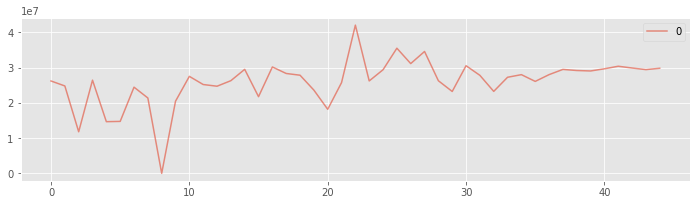

In [21]:
plt.style.use('ggplot') 
font = {'family' : 'meiryo'}
#matplotlib.rc('font', **font)
pd.DataFrame(hifuku).plot(alpha=0.6, figsize=(12,3))
today=int(datetime.now().strftime("%Y%m%d"))
plt.savefig("dailyreport%d.jpg"%(today))